# Mini deep-learning framework

In [1]:
import sys
import os
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import math
from modules import Linear, LossMSE, ReLu, Tanh, Sequential, Trainer, LogManager
from modules.helpers import standardize, plotCostAndData
logger = LogManager.getLogger(__name__, False)

## Single Layer

In [2]:
X = 2 * np.random.rand(100,1)
Y = 4 +3*X+np.random.randn(100,1)
X = standardize(X)
Y = standardize(Y)
model = Linear(X.shape[1],Y.shape[1])
optim = LossMSE()
trainer = Trainer(model, optim)
eta = 0.001
iterations = 100

In [3]:
cost = trainer.trainBatchGD(X,Y,iterations, eta=eta)

12-Jun-19 02:11:19 modules.trainer INFO Training model with params: 1
12-Jun-19 02:11:19 modules.trainer INFO Iter: 0 Cost:50.14004192725092
12-Jun-19 02:11:20 modules.trainer INFO Iter: 10 Cost:19.190621271153713
12-Jun-19 02:11:20 modules.trainer INFO Iter: 20 Cost:15.028682311746847
12-Jun-19 02:11:20 modules.trainer INFO Iter: 30 Cost:14.469236361952047
12-Jun-19 02:11:20 modules.trainer INFO Iter: 40 Cost:14.394121973068886
12-Jun-19 02:11:20 modules.trainer INFO Iter: 50 Cost:14.384068497934578
12-Jun-19 02:11:20 modules.trainer INFO Iter: 60 Cost:14.382734682952856
12-Jun-19 02:11:20 modules.trainer INFO Iter: 70 Cost:14.3825620870991
12-Jun-19 02:11:20 modules.trainer INFO Iter: 80 Cost:14.38254138624242
12-Jun-19 02:11:20 modules.trainer INFO Iter: 90 Cost:14.38253952994329


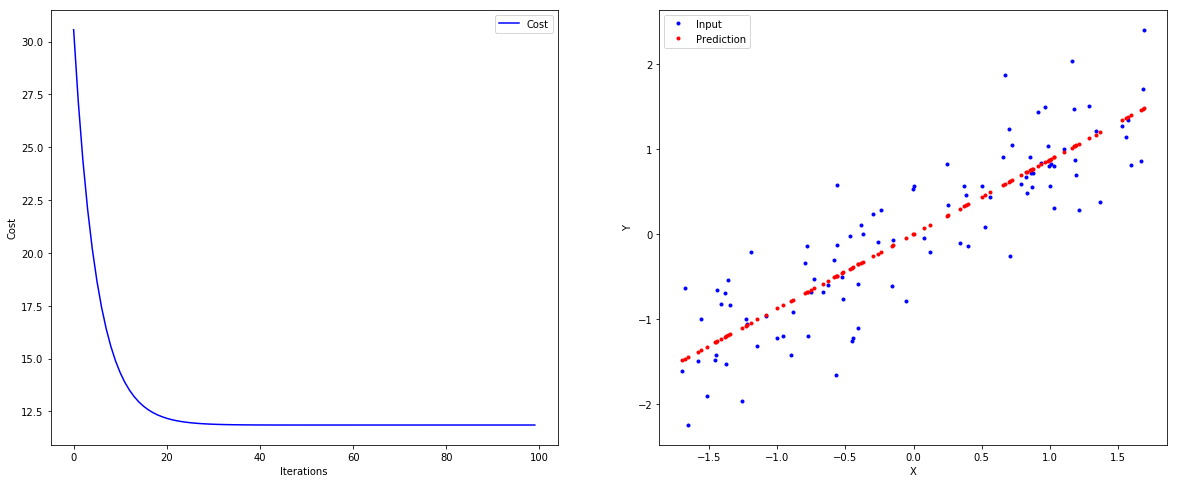

In [8]:
plotCostAndData(model,X,Y,cost)

## MultiLayer

### Linear + Activation

In [4]:
class NN(object):
    def __init__(self, in_layer_size, out_layer_size):
        self.fc1 = Linear(in_layer_size,out_layer_size, bias=False)
        self.ac1 = Tanh()
        
    def forward(self, x):
        s1 = self.fc1.forward(x)
        a1 = self.ac1.forward(s1)
        return a1
    
    def update(self, params):
        #print("W:", params[0].shape)
        self.fc1.update([params[0]])
        if len(params)>1:
            #print("R:", len([params[1]]))
            self.ac1.update(params[1])
        #print("W:",self.fc1.param()[0][0])
        #print("dW:",self.fc1.param()[0][1])

    def backward(self, dL_dy):
        '''
        output dy/dw2 = d(f(wx+b))/dw = x
        output dy/dw1 = d(f(wx+b))/dw = x 
        '''
        #print(dL_dy)
        dL_ds = self.ac1.backward(dL_dy)
        dL_dy0 = self.fc1.backward(dL_ds)
        #print(dL_dy0)
        return dL_dy0
    
    
    def param(self):
        return [self.fc1.param()[0],self.ac1.param()[0]]

In [5]:
nn = NN(X.shape[1],Y.shape[1])
optim_nn = LossMSE()
trainer = Trainer(nn, optim_nn)
eta = 0.001
iterations = 100

In [6]:
cost_nn = trainer.trainBatchGD(X,Y,iterations, eta=eta)

12-Jun-19 02:11:24 modules.trainer INFO Training model with params: 2
12-Jun-19 02:11:24 modules.trainer INFO Iter: 0 Cost:152.65299351568876
12-Jun-19 02:11:25 modules.trainer INFO Iter: 10 Cost:150.28916263145211
12-Jun-19 02:11:25 modules.trainer INFO Iter: 20 Cost:147.45099499164715
12-Jun-19 02:11:25 modules.trainer INFO Iter: 30 Cost:143.99171646476603
12-Jun-19 02:11:25 modules.trainer INFO Iter: 40 Cost:139.70162378159387
12-Jun-19 02:11:25 modules.trainer INFO Iter: 50 Cost:134.2755324743507
12-Jun-19 02:11:25 modules.trainer INFO Iter: 60 Cost:127.26417817731257
12-Jun-19 02:11:25 modules.trainer INFO Iter: 70 Cost:118.01025620920717
12-Jun-19 02:11:25 modules.trainer INFO Iter: 80 Cost:105.60294582459908
12-Jun-19 02:11:25 modules.trainer INFO Iter: 90 Cost:89.03076479236984


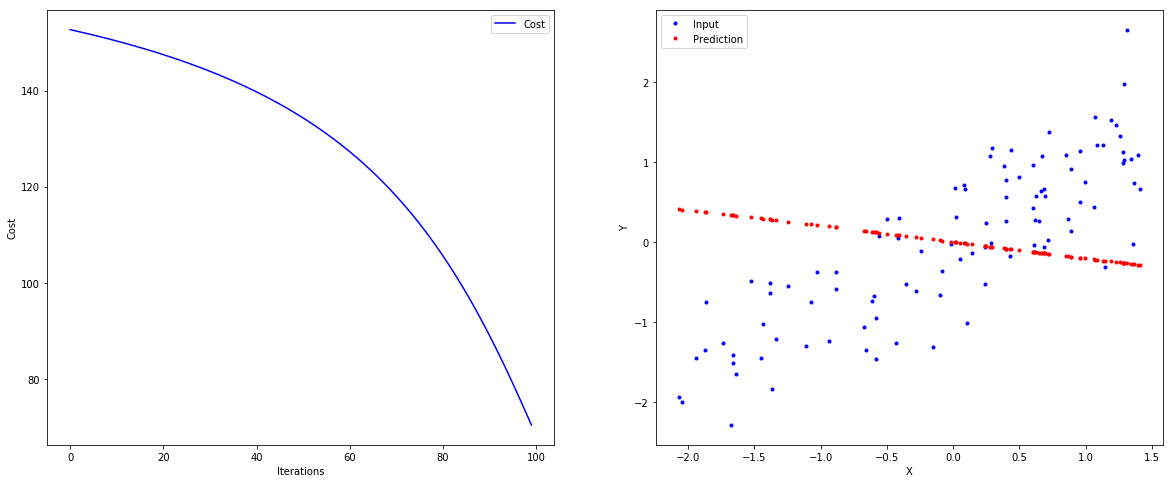

In [7]:
plotCostAndData(nn,X,Y,cost_nn)

### MLP (Lin+ Relu + Lin)

In [2]:
N, D_in, H1,H2, D_out = 200, 1, 50, 50, 1

X = 3 * np.random.rand(N,D_in)
Y = 4*np.sin(X) + 0.5*np.random.randn(N,D_out)
X = standardize(X)
Y = standardize(Y)

print("X", X.shape)
print("Y", Y.shape)

X (200, 1)
Y (200, 1)


In [3]:
class NN2(object):
    def __init__(self, in_layer_size, hidden_layer_size, out_layer_size):
        self.fc1 = Linear(in_layer_size,hidden_layer_size)
        self.ac1 = ReLu()
        self.fc2 = Linear(hidden_layer_size,out_layer_size)
        #self.ac2 = Tanh()

        
    def forward(self, x):
        s1 = self.fc1.forward(x)
        a1 = self.ac1.forward(s1)
        a2 = self.fc2.forward(a1)
        return a2
    
    def update(self, params):
        self.fc1.update([params[0]])
        self.fc2.update([params[1]])
        
    def backward(self, dL_dy2):
        '''
        output dy/dw2 = d(f(wx+b))/dw = x
        output dy/dw1 = d(f(wx+b))/dw = x 
        '''

        #dL_ds2 = self.ac2.backward(dL_dy2)
        dL_dy1 = self.fc2.backward(dL_dy2)
        dL_ds1 = self.ac1.backward(dL_dy1)
        dL_dy0 = self.fc1.backward(dL_ds1)
        
        return dL_dy0
    
    
    def param(self):
        return [self.fc1.param()[0],self.fc2.param()[0]]

In [4]:
nn = NN2(X.shape[1],30,Y.shape[1])
optim_nn = LossMSE()
trainer = Trainer(nn, optim_nn)
iterations = 200
eta = 0.0001

In [5]:
cost_nn = trainer.trainBatchGD(X,Y,iterations, eta=eta)

12-Jun-19 02:14:46 modules.trainer INFO Training model with params: 2
12-Jun-19 02:14:46 modules.trainer INFO Iter: 0 Cost:91.59704302548982
12-Jun-19 02:14:46 modules.trainer INFO Iter: 10 Cost:83.94057691908758
12-Jun-19 02:14:46 modules.trainer INFO Iter: 20 Cost:80.1496427491065
12-Jun-19 02:14:46 modules.trainer INFO Iter: 30 Cost:77.81075743215894
12-Jun-19 02:14:46 modules.trainer INFO Iter: 40 Cost:76.29533490415108
12-Jun-19 02:14:46 modules.trainer INFO Iter: 50 Cost:75.79541603445463
12-Jun-19 02:14:46 modules.trainer INFO Iter: 60 Cost:76.0205357522316
12-Jun-19 02:14:46 modules.trainer INFO Iter: 70 Cost:76.62516227220294
12-Jun-19 02:14:46 modules.trainer INFO Iter: 80 Cost:77.5206722331962
12-Jun-19 02:14:46 modules.trainer INFO Iter: 90 Cost:78.73415054886188
12-Jun-19 02:14:46 modules.trainer INFO Iter: 100 Cost:79.77530534213062
12-Jun-19 02:14:47 modules.trainer INFO Iter: 110 Cost:79.90777781014323
12-Jun-19 02:14:47 modules.trainer INFO Iter: 120 Cost:79.2695017554

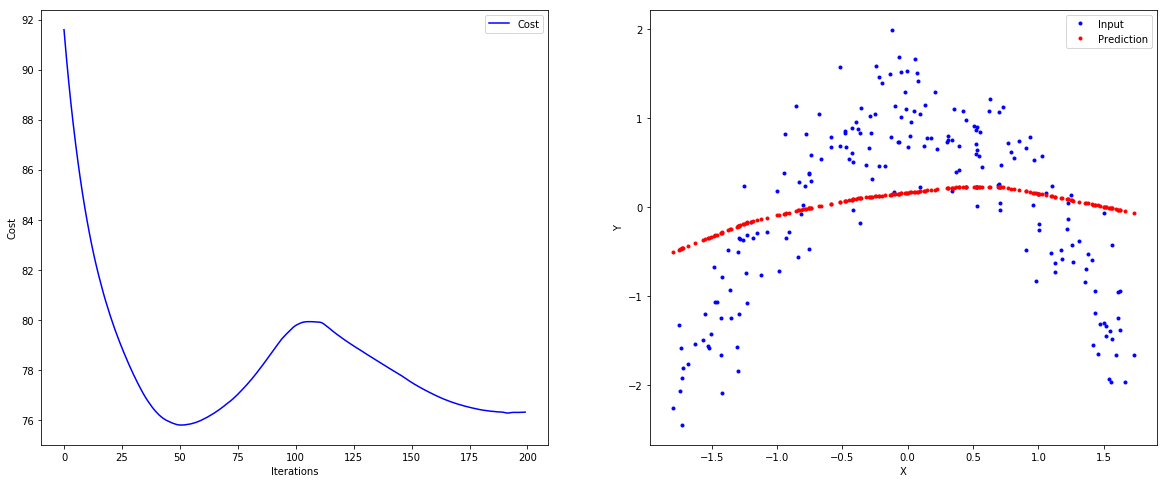

In [6]:
plotCostAndData(nn,X,Y,cost_nn)

### Sequential

In [7]:
nn_seq = Sequential(
    Linear(D_in, H1),
    Tanh(),
    Linear(H1, H2),
    Tanh(),
    Linear(H2, D_out)
)

optim_nn = LossMSE()
trainer = Trainer(nn_seq, optim_nn)
iterations = 300
eta = 0.0008
nn_seq.modules

{0: <modules.linear.Linear at 0x113a88f98>,
 1: <modules.activations.Tanh at 0x113a88630>,
 2: <modules.linear.Linear at 0x113a88978>,
 3: <modules.activations.Tanh at 0x1133b2be0>,
 4: <modules.linear.Linear at 0x113a88198>}

In [8]:
cost_nn_seq = trainer.trainBatchGD(X,Y, iterations, eta=eta)

12-Jun-19 02:14:51 modules.trainer INFO Training model with params: 5
12-Jun-19 02:14:51 modules.trainer INFO Iter: 0 Cost:109.36903184614735
12-Jun-19 02:14:51 modules.trainer INFO Iter: 10 Cost:96.39925261740949
12-Jun-19 02:14:51 modules.trainer INFO Iter: 20 Cost:94.07763031062993
12-Jun-19 02:14:51 modules.trainer INFO Iter: 30 Cost:91.80925387933338
12-Jun-19 02:14:51 modules.trainer INFO Iter: 40 Cost:89.31037013558287
12-Jun-19 02:14:51 modules.trainer INFO Iter: 50 Cost:86.26004207635529
12-Jun-19 02:14:51 modules.trainer INFO Iter: 60 Cost:82.35746631246994
12-Jun-19 02:14:51 modules.trainer INFO Iter: 70 Cost:77.44080820394292
12-Jun-19 02:14:51 modules.trainer INFO Iter: 80 Cost:71.63548907402942
12-Jun-19 02:14:51 modules.trainer INFO Iter: 90 Cost:65.37474022451158
12-Jun-19 02:14:52 modules.trainer INFO Iter: 100 Cost:59.19760218980888
12-Jun-19 02:14:52 modules.trainer INFO Iter: 110 Cost:53.50110965160473
12-Jun-19 02:14:52 modules.trainer INFO Iter: 120 Cost:48.461382

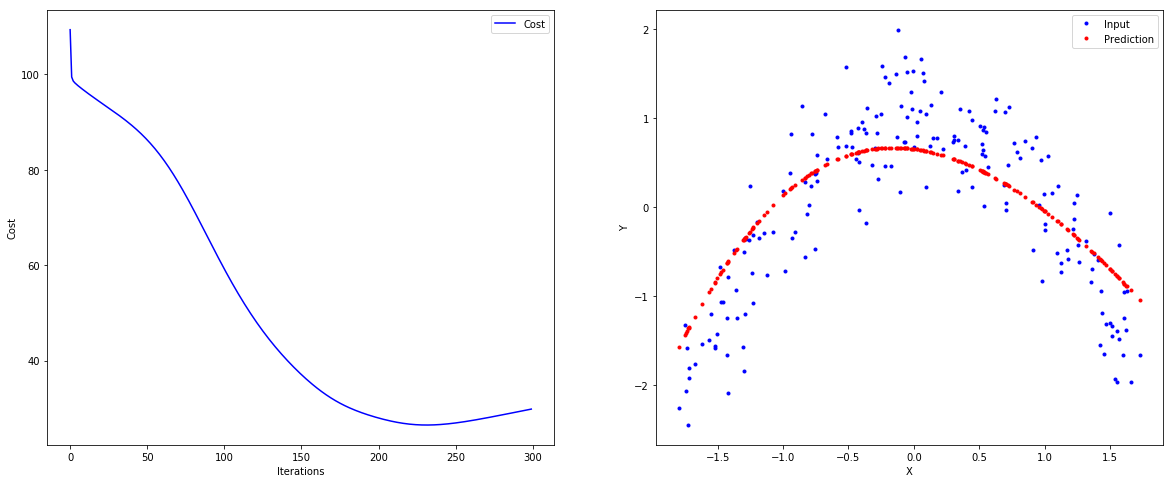

In [9]:
plotCostAndData(nn_seq,X,Y,cost_nn_seq)

## Circular input

In [248]:
def generate_disc_set(nb, radius=1):
    coords = 4*radius*np.random.rand(nb,2)
    center = [2*radius,2*radius]
    #target = np.empty([nb,1])
    target = np.empty([nb,2])
    for index in range(nb):
        x = coords[index][0]
        y = coords[index][1]
        d = np.sqrt(np.square(x-center[0])+np.square(y-center[1]))
        inside = 1.0 if d <= radius else 0
        target[index][0] = inside
        target[index][1] = np.abs(1-inside)
        
    return coords, target

In [249]:
nb = 1000
inp_train, target_train  = generate_disc_set(nb)
inp_test, target_test  = generate_disc_set(nb)

# Standardizing the data
inp_train = standardize(inp_train);
inp_test = standardize(inp_test);

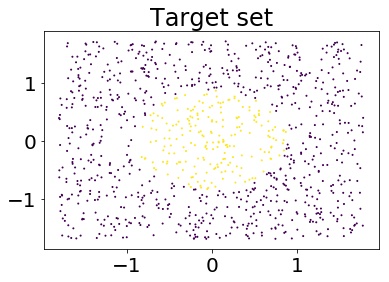

In [250]:
plt.title('Target set')
plt.scatter(inp_train[:, 0], inp_train[:, 1], c = target_train[:,0], s = 1)

Iter: 0 Cost:221.25039161829062
Iter: 3 Cost:111.97337375530321
Iter: 6 Cost:93.04216671489228
Iter: 9 Cost:87.8872715299817
Iter: 12 Cost:85.58320208168065
Iter: 15 Cost:84.10901636740432
Iter: 18 Cost:82.93751631455585
Iter: 21 Cost:81.90122105085365
Iter: 24 Cost:80.93449714443979
Iter: 27 Cost:80.00679281727231
Iter: 30 Cost:79.11053913369007
Iter: 33 Cost:78.23745864324134
Iter: 36 Cost:77.39936616938765
Iter: 39 Cost:76.5836674076652
Iter: 42 Cost:75.78548868875478
Iter: 45 Cost:75.01444200892219
Iter: 48 Cost:74.26677052260138
Iter: 51 Cost:73.53180476331673
Iter: 54 Cost:72.81778501134436
Iter: 57 Cost:72.11795442772338
Iter: 60 Cost:71.43099334972376
Iter: 63 Cost:70.75514383615645
Iter: 66 Cost:70.10177280180729
Iter: 69 Cost:69.4679096239319
Iter: 72 Cost:68.85116013060531
Iter: 75 Cost:68.24521343599717
Iter: 78 Cost:67.65121803524073
Iter: 81 Cost:67.06734104820345
Iter: 84 Cost:66.50384888682717
Iter: 87 Cost:65.96543843358371
Iter: 90 Cost:65.43809467102467
Iter: 93 Cost

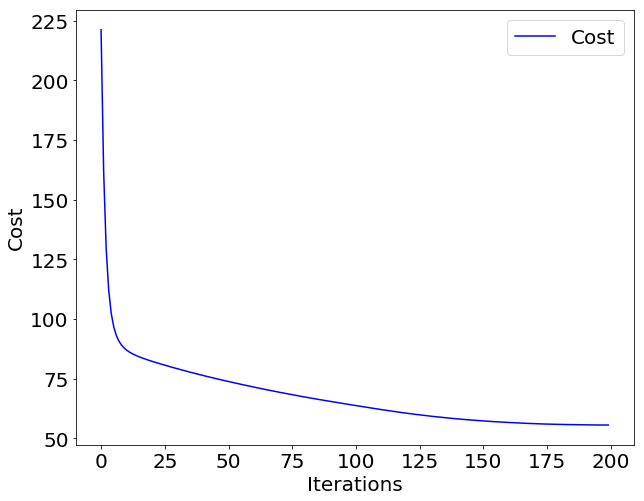

In [277]:
D_in, H,D_out = 2, 30, 2
nn_test = Sequential(
    Linear(D_in, H),
    ReLu(),
    Linear(H, H),
    Tanh(),
    Linear(H, H),
    Tanh(),
    Linear(H, H),
    Tanh(),
    Linear(H, D_out),
    Tanh()
)

optim_nn = LossMSE()
trainer = Trainer(nn_test, optim_nn)
iterations = 200
eta = 0.00005
batch_size = 50
cost_nn_seq = trainer.trainBatchGD(inp_train, target_train, iterations, eta=eta, batch_size=batch_size)
plotCostAndData(nn_test,inp_train,target_train,cost_nn_seq)

In [243]:
# Computing the test error
def compute_nb_errors(model, data_input, data_target):
    mini_batch_size = 10
    nb_data_errors = 0
    for b in range(0, data_input.shape[0], mini_batch_size):
        input_batch = data_input[b:b+mini_batch_size]
        predicted_classes = model.forward(input_batch)
        predicted_classes = predicted_classes > 0.5
        for k in range(mini_batch_size):
            if data_target[b + k, 0] != predicted_classes[k, 0]:
                nb_data_errors += 1

    return nb_data_errors

In [278]:
nb_test_err = compute_nb_errors(nn_test, inp_test, target_test) 
print('Number of errors on the test set : ', nb_test_err)

Number of errors on the test set :  176


Text(0.5, 1.0, 'Prediction on the test set')

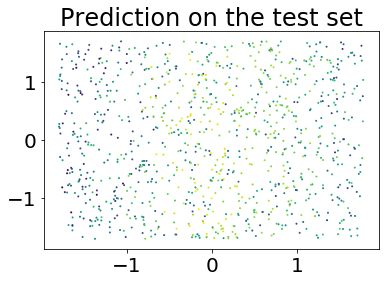

In [291]:
prediction = nn_test.forward(inp_train)
plt.scatter(inp_train[:, 0], inp_test[:, 1], c = prediction[:, 0], s = 1)
plt.title('Prediction on the test set')